In [1]:
import numpy as np
import os
import pandas as pd
import neurokit2 as nk
from scipy.signal import find_peaks,iirnotch, lfilter
from scipy import signal
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import timedelta

In [2]:
destination_folder = r"C:\Users\leagi\Documents\EI22\Projet Ecole\data\Préprocessing"
root_folder = r"C:\Users\leagi\Documents\EI22\Projet Ecole\data\ecg_dataset.csv"

In [3]:
# fonction qui lit le fichier csv contennant toutes les résultats des expériences ecg
def read_dataset_csv(root_folder):
    dataset_df = pd.read_csv(root_folder, sep=";")
    return dataset_df
dataset_df = read_dataset_csv(root_folder)

In [4]:
#fonction qui créer la base de temps permettant de tracer les graphs
# tous les signaux sont sur 1 min peut importe le nombre de point
# Le temps est donnée avec 3 chiffres après la virgule (ne pas diminuer)
def creation_base_time(data):
    time=[0]
    tmp = 0
    for i in range(len(data)-1):
        tmp = i*(60/len(data))
        time.append(round(tmp, 3))
    return time  

In [5]:
#fonction qui filtre le signal de 1 seule expérience
def preprocessing_one_ecg_signal(ID, Task, data, destination_folder, figure):
    #creation base de temps car pas le même nombre de point pour chaque expérience
    time = creation_base_time(data)
    
    #Filtrage
    signal_filtered = nk.signal_filter(data["ECG"].values, 500, lowcut=0.5, highcut=20, method = "butterworth", order=5)
    
    #dataframe avec le temps les données filtrées et non filtrées
    ecg_df = pd.DataFrame({"Time" : time, "ECG_Raw" : data["ECG"], "ECG_Filtered" : signal_filtered})
   
    #tracé de des courbes avant et après filtrage
    if figure:
        ecg_df[2000:4000].plot(x="Time", y=["ECG_Raw", "ECG_Filtered"], title="Comparaison signaux ecg",figsize=(12,4))
        plt.xlabel("Time(s)")
        plt.ylabel("Amplitude")

    #Enregistrement du dataframe en fichier csv 
    filename = ID + '_' + Task + '_ecg_data_filtered.csv'
    completeDestination = destination_folder + "\\"+ ID
        #Création des dossiers de la base donnée
    if not os.path.exists(completeDestination):
        os.makedirs(completeDestination)
    ecg_df.to_csv(os.path.join(completeDestination, filename), sep=';', index=False)
    
    return

In [6]:
def preprocessing_ecg_datas(root_folder, destination_folder):
    #ouverture de la base de donnée
    dataset_df = read_dataset_csv(root_folder)
    
    #traitement de tous les signaux 
    groups=dataset_df.groupby(['ID', 'Task'])
    for (iden, task), group in tqdm(groups):
        group_data = groups.get_group((iden, task))
        preprocessing_one_ecg_signal(iden, task, group_data, destination_folder, False)
        
    return 

In [44]:
#commande à éxécuter pour filtrer tous les signaux ecg pour chaque personne et expérience
preprocessing_ecg_datas(root_folder, destination_folder)

100%|██████████| 774/774 [03:17<00:00,  3.92it/s]


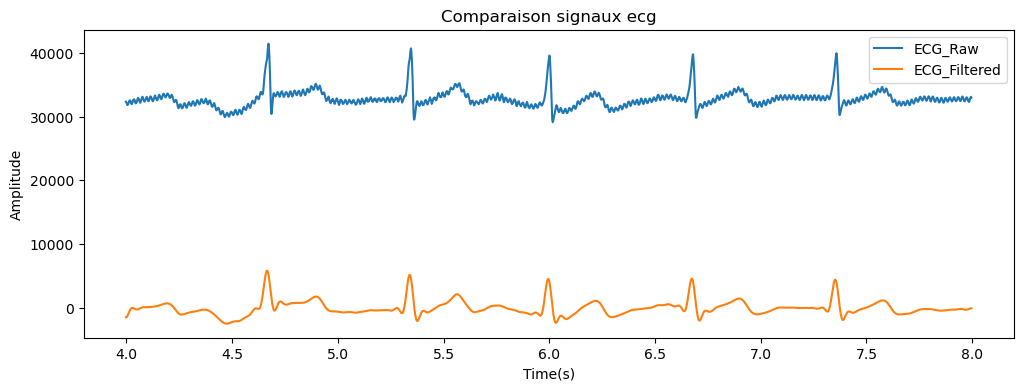

In [7]:
#pour tester le filtrage sur un fichier de notre choix
data=pd.read_csv(r'C:\Users\leagi\Documents\EI22\Projet Ecole\data\Physiological\9t6n\9t6n_Speaking_ecg_data.csv')

preprocessing_one_ecg_signal('9t6n', 'Speaking', data, destination_folder, True)